케라스에 저장되어있는 미리 학습된 모델을 불러오고 사용하는 방법을 알아보겠습니다. weights=None 을 넣어주면 웨이트가 랜덤으로 초기화되고 weights='imagenet' 옵션을 주면 이미지넷 데이터로 학습된 웨이트가 불러와 집니다.

In [1]:
#from keras.applications.resnet50 import ResNet50 as pre_model
#from keras.applications.resnet50 import preprocess_input, decode_predictions

#from keras.applications.xception import Xception as pre_model
#from keras.applications.xception import preprocess_input, decode_predictions

from keras.applications.vgg16 import VGG16 as pre_model
from keras.applications.vgg16 import preprocess_input, decode_predictions

#from keras.applications.vgg19 import VGG19 as pre_model
#from keras.applications.vgg19 import preprocess_input, decode_predictions

#from keras.applications.inception_v3 import InceptionV3 as pre_model
#from keras.applications.inception_v3 import preprocess_input, decode_predictions

model = pre_model( weights='imagenet' )
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

preprocess_input 을 수행하면 입력 이미지도 변경이 되는것을 알 수 있습니다.

<class 'PIL.Image.Image'>


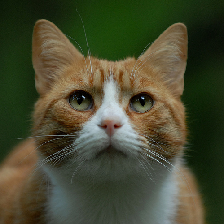

image (224, 224, 3) float32
[[[ 9. 22.  4.]
  [ 9. 22.  4.]
  [10. 23.  5.]
  ...
  [25. 40. 11.]
  [21. 37. 10.]
  [21. 37. 11.]]

 [[11. 24.  7.]
  [12. 25.  7.]
  [12. 25.  7.]
  ...
  [19. 33.  7.]
  [23. 39. 10.]
  [21. 35. 10.]]

 [[13. 26.  8.]
  [14. 27.  9.]
  [14. 27.  9.]
  ...
  [19. 33.  8.]
  [20. 34.  8.]
  [22. 36. 10.]]

 ...

 [[85. 70. 47.]
  [85. 70. 47.]
  [85. 69. 44.]
  ...
  [30. 46. 20.]
  [32. 47. 24.]
  [29. 44. 21.]]

 [[86. 70. 47.]
  [86. 70. 47.]
  [85. 69. 44.]
  ...
  [32. 46. 20.]
  [30. 43. 17.]
  [34. 48. 23.]]

 [[84. 68. 45.]
  [84. 68. 45.]
  [81. 67. 41.]
  ...
  [32. 48. 22.]
  [33. 47. 22.]
  [35. 49. 24.]]]
images (1, 224, 224, 3) float32
[[[[ 9. 22.  4.]
   [ 9. 22.  4.]
   [10. 23.  5.]
   ...
   [25. 40. 11.]
   [21. 37. 10.]
   [21. 37. 11.]]

  [[11. 24.  7.]
   [12. 25.  7.]
   [12. 25.  7.]
   ...
   [19. 33.  7.]
   [23. 39. 10.]
   [21. 35. 10.]]

  [[13. 26.  8.]
   [14. 27.  9.]
   [14. 27.  9.]
   ...
   [19. 33.  8.]
   [20. 34.  

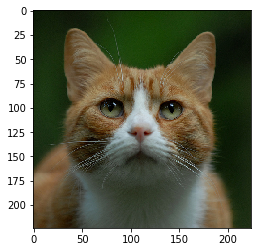

x (1, 224, 224, 3) float32
[[[[ -99.939     -94.779    -114.68    ]
   [ -99.939     -94.779    -114.68    ]
   [ -98.939     -93.779    -113.68    ]
   ...
   [ -92.939     -76.779     -98.68    ]
   [ -93.939     -79.779    -102.68    ]
   [ -92.939     -79.779    -102.68    ]]

  [[ -96.939     -92.779    -112.68    ]
   [ -96.939     -91.779    -111.68    ]
   [ -96.939     -91.779    -111.68    ]
   ...
   [ -96.939     -83.779    -104.68    ]
   [ -93.939     -77.779    -100.68    ]
   [ -93.939     -81.779    -102.68    ]]

  [[ -95.939     -90.779    -110.68    ]
   [ -94.939     -89.779    -109.68    ]
   [ -94.939     -89.779    -109.68    ]
   ...
   [ -95.939     -83.779    -104.68    ]
   [ -95.939     -82.779    -103.68    ]
   [ -93.939     -80.779    -101.68    ]]

  ...

  [[ -56.939003  -46.779     -38.68    ]
   [ -56.939003  -46.779     -38.68    ]
   [ -59.939003  -47.779     -38.68    ]
   ...
   [ -83.939     -70.779     -93.68    ]
   [ -79.939     -69.779     -

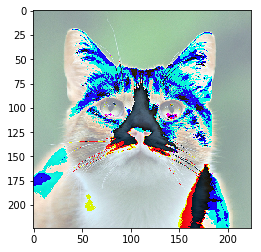

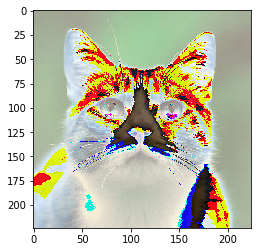

prediction
[[('n02123045', 'tabby', 0.32873383), ('n02123159', 'tiger_cat', 0.26884335), ('n02124075', 'Egyptian_cat', 0.20320223)]]


In [2]:
# pip install pillow
%matplotlib inline
import keras
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np

pil_img = keras.preprocessing.image.load_img( 'cat.jpg', target_size=(224, 224) )
print( type(pil_img) )
display(pil_img)

image = keras.preprocessing.image.img_to_array(pil_img)
print( 'image', image.shape, image.dtype )
print( image )

images = np.expand_dims(image, axis=0)
print( 'images', images.shape, images.dtype )
print( images )

plt.imshow(images[0].astype('uint8'))
plt.show()

x = preprocess_input(images)
print( 'x', x.shape, x.dtype )
print( x )

plt.imshow(images[0].astype('uint8'))
plt.show()
plt.imshow(x[0].astype('uint8'))
plt.show()

pred = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
print('prediction')
print(decode_predictions(pred, top=3))